Santiago Chavarria Minakata 10/oct/2024

# Caminata aleatoria
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/da/Random_Walk_example.svg" width="300px" height="100px" />

Una caminata aleatoria (*random walk* en inglés) es una formalización matemática de la trayectoria que resulta al hacer pasos sucesivos aleatorios. Un ejemplo elemental de caminata aleatoria es la caminata aleatoria en la línea de números enteros $\mathbb{Z}$, la cual comienza en $0$ y en cada paso se mueve $+1$ o $-1$ con igual probabilidad.

Otros ejemplos:
- Trayectoria de una molécula al viajar en un fluido (líquido o gas).
- El camino que sigue un animal en su búsqueda de comida.
- El precio fluctuante de una acción.
- La situación de un apostador en un juego de azar.

Todos pueden ser aproximados por caminatas aleatorias, aunque no sean en verdad procesos aleatorios.

**Este también es un ejemplo de caminata aleatoria**

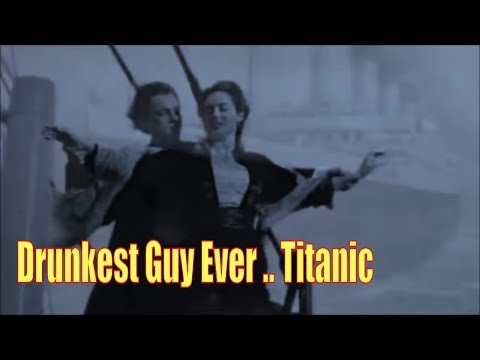

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('Y77WnkLbT2Q')

Teorema de limite central , no importa la agrupacion que tengas si tu la agrupas infinitamente la distribuicion sera normal.

### Caminata aleatoria en una dimensión
Como dijimos, un ejemplo elemental de caminata aleatoria es la caminata aleatoria en la línea de números enteros $\mathbb{Z}$, la cual comienza en $0$ y a cada paso se mueve $+1$ o $-1$ con igual probabilidad.

Esta caminata se puede ilustrar como sigue:
- Se posiciona en $0$ en la línea de números enteros y una moneda justa se tira.
- Si cae en **sol** nos moveremos una unidad a la derecha.
- Si cae en **águila** nos moveremos una unidad a la izquierda.

Notemos que después de $5$ pasos podremos estar en 1, −1, 3, −3, 5, or −5. Las posibilidades son las siguientes:

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/05/Flips.svg" width="900px" height="300px" />


Referencia:
- https://en.wikipedia.org/wiki/Random_walk

**Importante:** librería random.

Referencia:
- https://docs.python.org/3/library/random.html

In [8]:
import random

In [38]:
moneda=["aguila","sello"]
n= 10
pos=0
cam=[0]
for i in range (n) :
  lanzamiento = random.choice(moneda)
  if lanzamiento == "aguila":
    pos+=1
  else:
    pos-=1
  cam.append(pos)
print(cam)
    

[0, -1, -2, -3, -2, -1, -2, -3, -4, -5, -4]


In [127]:
personas=1000
n=10
cams=[]
for p in range(personas):
    pos=0
    cam=[0]
    for i in range (n) :
     lanzamiento = random.choice(moneda)
     if lanzamiento == "aguila":
       pos+=1
     else:
       pos-=1
     cam.append(pos)
    cams.append(cam)

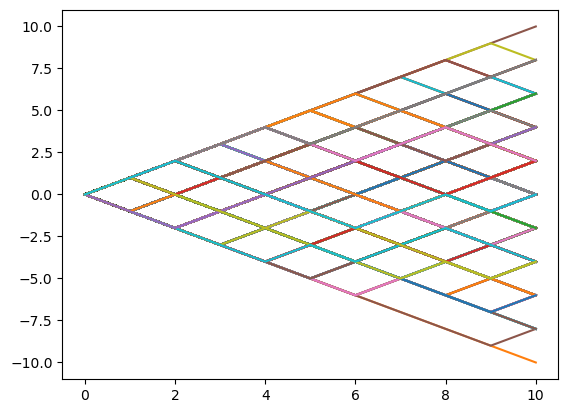

In [129]:
import matplotlib.pyplot as plt
plt.figure()
for p in range(personas):
    plt.plot(cams[p])

**Actividad.** Graficar, en una misma ventana de gráficos, al menos ocho caminatas aleatorias de 100 pasos.

In [154]:
import numpy as np
X = np.array(cams)
(X[:,-1]==-0).mean()
probabilidad=[]
for i in [-10,-8,-6,-4,-2,0,2,4,6,8,10]:
    probabilidad.append((X[:,-1]==i).mean())

### Usamos montecarlo para evaluar el resultado de la caminata aleatoria

- Describir, de nuevo, el proceso de la caminata aleatoria en el pizarrón y ver el valor esperado de la caminata después de N pasos.

- Luego, evaluar el proceso utilizando montecarlo y comparar resultados.

## Ejemplo

Ahora, para comprender el alcance de la simulación Montecarlo, tomaremos el ejemplo de un apostador básico.

Referencia:
- https://pythonprogramming.net/monte-carlo-simulator-python/

Supongamos que estamos en un casino especial, donde el usuario puede tirar un *dado metafórico* que puede dar como resultado del número uno (1) al número cien (100).

Si el usuario tira cualquier número entre 1 y 50, el casino gana. Si el usuario tira cualquier número entre 51 y 99, el usuario gana. Si el usuario tira 100, pierde.

Con esto, el casino mantiene un margen del 1%, el cual es mucho más pequeño que el margen típico en casinos, al igual que el margen de mercado cuando se incorporan costos por transacción.

Por ejemplo, [Scottrade](https://www.scottrade.com/) cobra $\$7$ USD por transacción. Si se invierten $\$1000$ USD por acción, esto significa que tienes que pagar $\$7$ USD para entrar, y $\$7$ USD para salir, para un total de $\$14$ USD.

Esto pone el margen en 1.4\%. Esto significa, que a largo plazo, las ganancias tienen que ser mayores a 1.4\% en promedio, de otra manera se estará perdiendo dinero. Aunque este porcentaje es pequeño, las probabilidades ya están en contra. La comercialización de acciones es un juego 50/50, especialmente en el corto plazo.

De nuevo, con nuestro ejemplo en mente, 1-50, la casa gana. 51-99 el usuario gana. Un 100 significa que la casa gana.

Ahora, comencemos. Primero tenemos que crear nuestro dado.

**Explorar función randint de la librería random**

In [158]:
import numpy as np
np.random.seed(14)
dado=np.random.randint(1,101)
dado

89

In [162]:
def dado():
    return np.random.randint(1,101)

In [170]:
dado()

72

In [176]:
def juego():
    d=dado()
    if((d>=51)and (d<100)):
        return True
    return False

In [189]:
juego()

False

Sin embargo, el dado por si solo no nos es útil. Necesitamos una función que nos devuelva sólamente si ganamos o perdemos.

Ahora, necesitamos crear un apostador. Empezaremos con uno extremadamente básico por ahora. Veremos, que aún con un apostador muy básico, aparecerán cosas muy reveladoras usando un simulador montecarlo.

**Apostador simple.** Las caracterísitcas son:
* Se empieza con un capital inicial, 
* Siempre se apuesta lo mismo,
* Y se va a apostar un número determinado de veces.
* Si se gana, se añade la apuesta al capital,
* Si se pierde, se descuenta la apuesta del capital.
* La función debe devolver un arreglo con el capital al final de cada apuesta.

In [191]:
def apostador(C0,a,n):
    C=[C0]
    for i in range(n):
        if juego()==True:
            C.append(C[-1]+a)
        else:
            C.append(C[-1]-a)
    return C

In [193]:
apostador(200,20,5)

[200, 220, 200, 180, 200, 180]

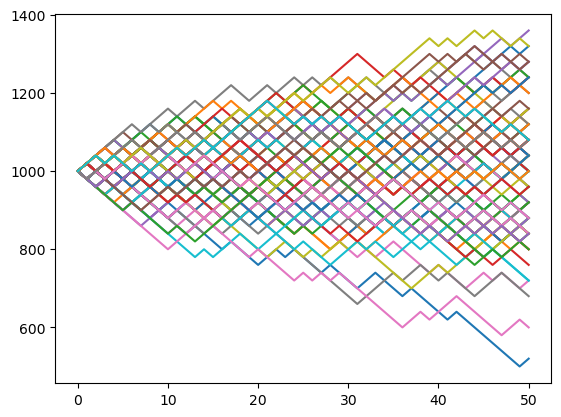

In [201]:
plt.figure()
Apostadores=[]
for p in range(100):
    Apostadores.append(apostador(1000,20,50))
    plt.plot(Apostadores[-1])
    plt.grid()

In [203]:
A=np.array(Apostadores)

In [205]:
A[:,-1].mean()

1001.6

In [207]:
A[:,-1].min()

520

In [211]:
A[:,-1].max()

1360

En realidad no nos importa tanto como evolucionan estos fondos. Nos importa más cuáles son los fondos al final (al largo plazo). Modificar la función anterior para ver esto.

Vemos que al largo plazo la mayoría de los apostadores quebraron. Sin embargo, esta forma de visualizar los resultados no es adecuada. Utilicemos matplotlib.

Por esto los apostadores pierden. Normalmente las probabilidades no están evidentemente muy en contra de ellos, solo un poco. Los casinos únicamente entienden psicología básica: ganar es extremadamente adictivo. Por ello, los casino se construyen para mantenerte jugando.

En el corto plazo, la mayoría de los jugadores no se dan cuenta que son más propensos a perder. Las veces que ganan y pierden son muy parejas. Estadísticamente, casi la mitad de las personas terminarán con ganancias después de jugar unas pocas veces. El problema es la adicción, y que ellos continuarán apostando, y por ende perdiendo sus ganancias. Es matemática extremadamente básica, pero la psicología humana es débil.